# Decision Tree Regressor Implementation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## California house pricing data set
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [4]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [7]:
df.shape

(20640, 9)

In [8]:
## Taking simple data set
df=df.sample(frac=0.25)

In [9]:
df.shape

(5160, 9)

In [12]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [13]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
622,2.5625,52.0,5.381643,0.995169,425.0,2.053140,37.73,-122.16
7131,3.0529,25.0,5.057143,1.062857,1466.0,2.792381,34.02,-118.12
1532,2.9526,24.0,4.725086,1.168385,1699.0,1.946163,37.90,-122.05
7968,2.6465,27.0,3.440806,1.091940,1690.0,2.128463,33.86,-118.20
634,4.5553,37.0,5.956522,0.956522,632.0,2.498024,37.71,-122.16


In [14]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [17]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [18]:
y_pred=regressor.predict(X_test)

In [19]:
y_pred

array([0.823  , 5.00001, 1.298  , ..., 2.796  , 1.083  , 1.897  ])

In [20]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [21]:
score

0.5771798562550701

In [23]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [24]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [25]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [26]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [27]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [28]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [29]:
%matplotlib inline

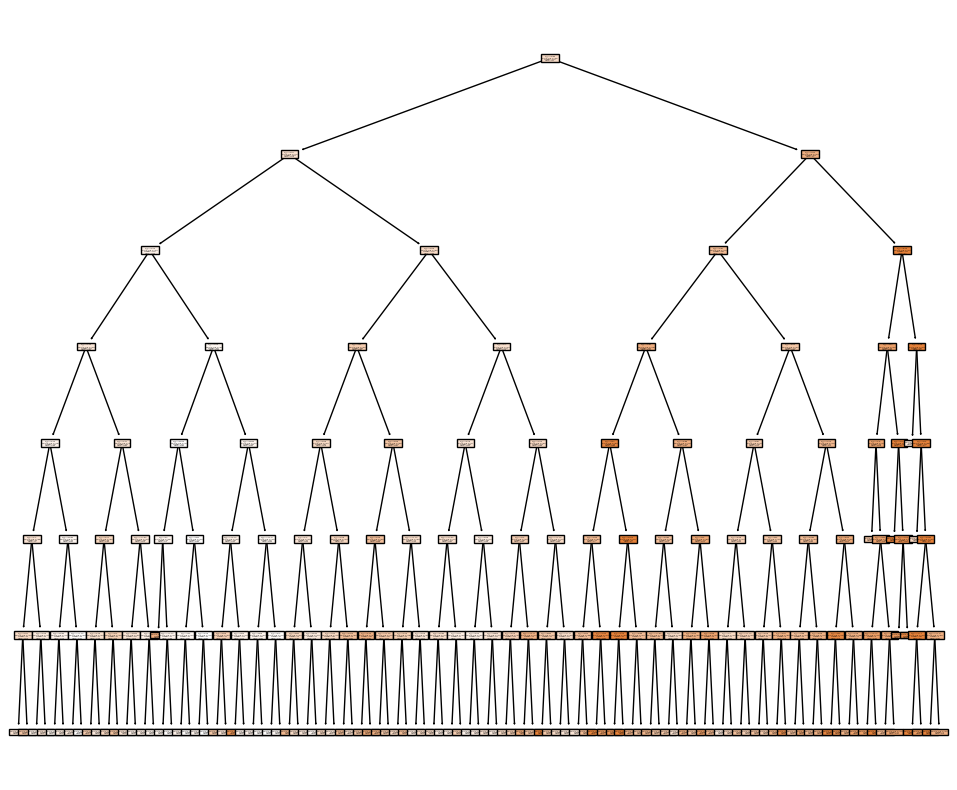

In [30]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [31]:
y_pred=regressorcv.predict(X_test)

In [32]:
r2_score(y_pred,y_test)

0.5015109680358926